#### Dynamic Topmodel

A native R implementation and enhancement of the Dynamic TOPMODEL semi-distributed hydrological model. Includes some pre-processsing and output routines. A description of the R package is available on [CRAN](https://cran.r-project.org/web/packages/dynatopmodel/dynatopmodel.pdf).



In [3]:
library("dynatopmodel")

#### Brompton Data

Brompton is a small (approx 26km^2) agricultural catchment in N.Yorkshire, UK. Its eastern edges rise in the North Yorks Moors and it drains southwards, becoming North Beck before joining the Wiske in Northallerton.

In the late 19th century the area upstream of Water End was drained and turned over to arable cul- tivation and has since suffered from infrequent, but severe, flooding due to intense autumn rainfall from synoptic systems moving in from the North Sea and high antecedent soil moisture conditions. The last event that flooded the village was in November 2012; flooding was narrowly avoided in the storms of Decemember 2015.

The catchment exhibits high land-channel connectivity due to heavily-modified natural channels and extensive artificial drainage, both surface and subsurface. It has a homogenous land cover, with 95 class 1 arable grassland and crops. The terrain is undulating with slightly acid, base-rich loamy and clayey soils predominating. Distances from the channel appear to exert most influence over the catchment response. Areas close to the channel appear to drain very fast due their connection to the network the presence of field drainage. These have a steep transmissivity, hence a low value for the m parameter. Those areas further away are slower-draining, with a larger value of m. This may provides the long recession tail observed.

The results of a run included, brompton$storm.run, are the September 2012 storm event The sim- ulation is for just over a week. Although giving a NSE of > 0.85, qualitatively the match is fairly poor, particulary at the start of the rising limb of the hydrograph. This may be due to an inaccurate rainfall record. It should be noted that the network width routing approach is unlikely to perform well in flood situations as it cannot deal with a variable wave velocity due to higher channel eff- ciencies at deeper flow or the slowing down of the response as the downstream channels overbank and some flow is diverted via the much rougher riprarian areas.

In our current research will we expect it to be flattened when routing using the physical model under development. This takes into account the increased roughness for flow routed overbank and the much increased flow width across the flood plain. The user is encouraged to experiment with the discretisation and group parameters in order to achieve a better qualitative fit. For example, it is suggested that areas nearest the channel are under the influence of field drainage and this may be a better approach to capturing the catchment’s behaviour.


In [4]:
data("brompton")

In [8]:
ls(brompton)

[1] "chans"     "dem"       "drn"       "flowdists" "groups"    "hru"      
 [7] "obs"       "pe"        "qobs"      "rain"      "reaches"   "routing"  
[13] "storm.run" "weights"

In [9]:
brompton$dem

class       : RasterLayer 
dimensions  : 649, 642, 416658  (nrow, ncol, ncell)
resolution  : 10, 10  (x, y)
extent      : 436325.7, 442745.7, 495676.1, 502166.1  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=tmerc +lat_0=49 +lon_0=-2 +k=0.9996012717 +x_0=400000 +y_0=-100000 +ellps=airy +towgs84=446.448,-125.157,542.06,0.15,0.247,0.842,-20.489 +units=m +no_defs 
data source : in memory
names       : dem_burned_drn 
values      : 39.39517, 122.9596  (min, max)


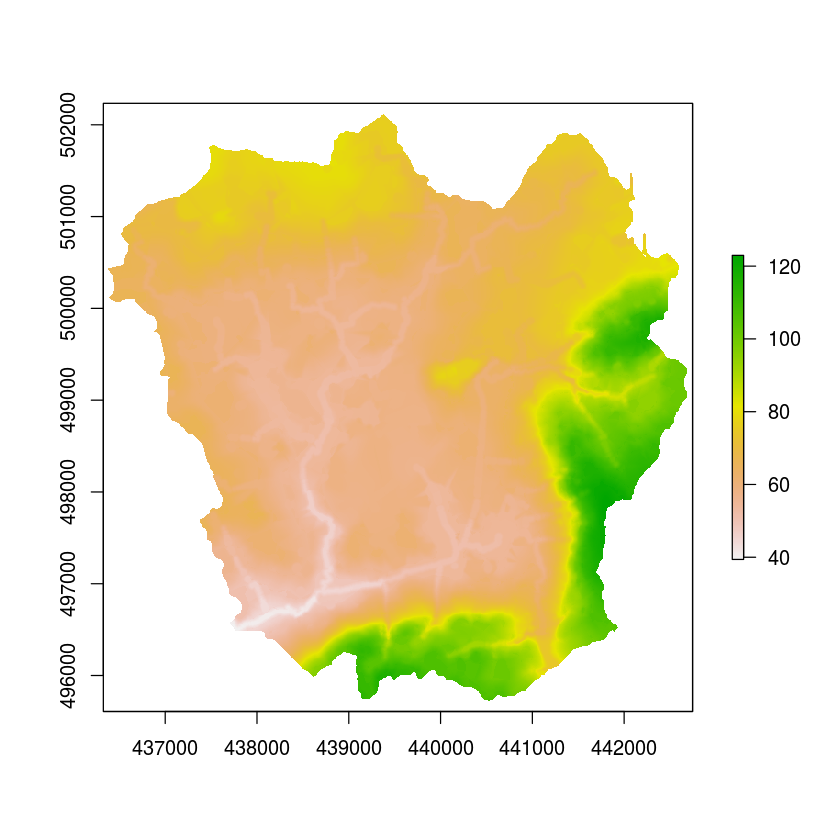

In [11]:
sp::plot(brompton$dem)

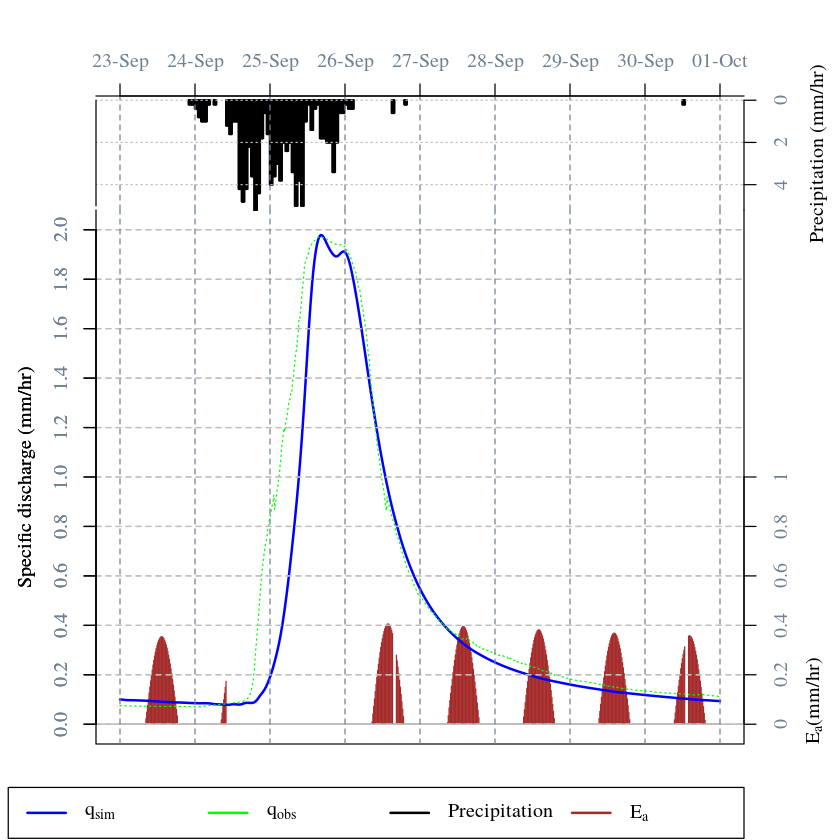

In [6]:
with (brompton$storm.run, disp_output(evap=ae*1000, qobs=qobs*1000,qsim=qsim*1000, rain=rain*1000, max.q=2, cex.main=1, col.axis="slategrey", las.time=1))